# Factors affecting drinking in highschool students

#### Data info:
The data set was collected in Portugal for students of two schools

# Load Data and Libraries

#### Loaded Portuguese Class Data - Math Class only added 13 unique data points, which isn't very much out of almost 700

In [116]:
import pandas as pd

df = pd.read_csv('student-portuguese.csv')



In [117]:
#other libraries and stats models to import - having all of them in a single place makes it easier to track
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.neighbors as knn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.neighbors as knn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# Clean the data

##### Look for any obvious gaps, missing data, or outliers

In [118]:
#checked data completeness - looks like there are no nulls
print(df.count())

school        649
sex           649
age           649
address       649
famsize       649
Pstatus       649
Medu          649
Fedu          649
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        649
internet      649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64


In [119]:
#checking unique answers for drinking levels questions - was curioius if there would be any zeros

print(df['Dalc'].unique())
print(df['Walc'].unique())



[1 2 5 3 4]
[1 3 2 4 5]


## Alcohol Counsumption Variables

##### See what the counts look like for the alcohol-related variables

In [120]:
df.groupby('Walc').size()

Walc
1    247
2    150
3    120
4     87
5     45
dtype: int64

In [121]:
df.groupby('Dalc').size()

Dalc
1    451
2    121
3     43
4     17
5     17
dtype: int64

In [122]:
#Created a variable that unifies weekday and weekend drinking, alc

df['alc']=df['Dalc']+df['Walc']


## Age

##### Due to the fact that 20, 21, and 22 year-olds have 6, 2, and 1 student respectively, I will drop all three to avoid skewing the data due to factors relating to age that I can't easily account for, so I am going to filter out all ages where len(age) is less than or equal to 20.

In [123]:
df = df.groupby('age').filter(lambda x: len(x)>20)

In [124]:
#verify that the dataset now looks as I expect - only ages 15-19

df.groupby('age').size()

age
15    112
16    177
17    179
18    140
19     32
dtype: int64

In [125]:
df.groupby('age').size()

age
15    112
16    177
17    179
18    140
19     32
dtype: int64

## Check for Normality

### OUTCOME: 
Only G1 (one of three sets of grades) is normal. Will stay away from models that require a normal distribution.

In [126]:
normal=[]

mylistnotcategorical= ['age','failures','absences', 'G1', 'G2', 'G3']

for var in mylistnotcategorical:
    if stats.normaltest(df[var]).pvalue > 0.5:
        normal.append(var)
    print normal
    print var + ": " + '\nNormal Test: {}'.format(stats.normaltest(df[var]).pvalue)

[]
age: 
Normal Test: 2.9739239936e-18
[]
failures: 
Normal Test: 2.55007685154e-99
[]
absences: 
Normal Test: 3.85361191525e-64
['G1']
G1: 
Normal Test: 0.922685982325
['G1']
G2: 
Normal Test: 1.79064021775e-09
['G1']
G3: 
Normal Test: 1.51810257162e-25


##### Created a graph to view the distributions more visually

<IPython.core.display.Javascript object>


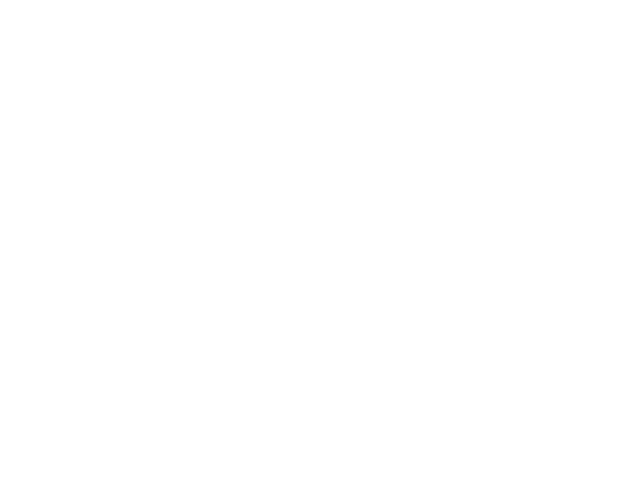

In [127]:
mylistnotcategorical= ['age','failures','absences', 'G1', 'G2', 'G3']


%matplotlib notebook
for var in mylistnotcategorical:
    df[var].plot(kind='density')

<IPython.core.display.Javascript object>


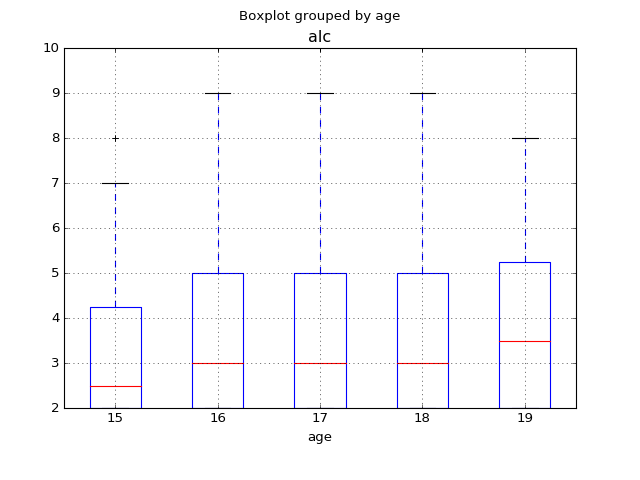

In [192]:
%matplotlib notebook

df.boxplot(column='alc', by='age')

<IPython.core.display.Javascript object>


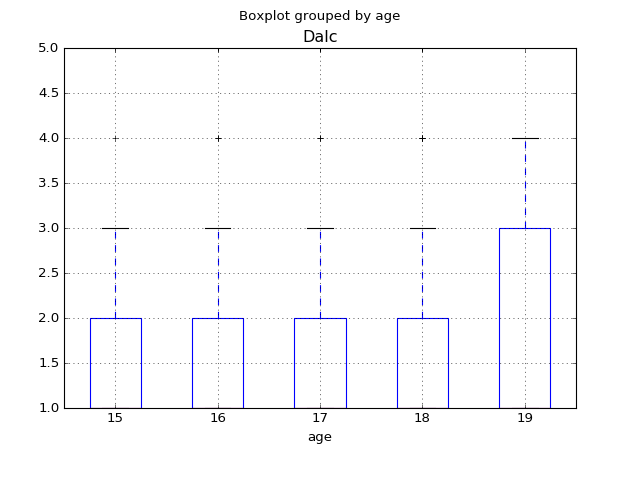

In [194]:
%matplotlib notebook

df.boxplot(column='Dalc', by='age')

In [197]:
df.groupby('Dalc')['age'].count()

Dalc
1    446
2    119
3     43
4     17
5     15
Name: age, dtype: int64

## Target Variables

Alc makes sense since it's the overall drinking indicator. I want to see if weekend and weekday drinking are different. It's also easier for some models to work with five categories instead of 9.

# Dummies

Create dummies and remove original variable

In [129]:
#figure out variables with type object to create dummies

df.dtypes  

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
alc            int64
dtype: object

In [130]:
needdummies = ['sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school']
delfordummies=[]

for var in needdummies:
    df = pd.concat([df ,pd.get_dummies(df[var], drop_first =True, prefix = "is_" + var)], axis=1)
    delfordummies.append(var)
    del df[var]

mylist=list(df.columns.values)

In [131]:
#Verify no object types left

df.dtypes

age                     int64
Medu                    int64
Fedu                    int64
traveltime              int64
studytime               int64
failures                int64
famrel                  int64
freetime                int64
goout                   int64
Dalc                    int64
Walc                    int64
health                  int64
absences                int64
G1                      int64
G2                      int64
G3                      int64
alc                     int64
is_sex_M                uint8
is_address_U            uint8
is_famsize_LE3          uint8
is_Pstatus_T            uint8
is_Mjob_health          uint8
is_Mjob_other           uint8
is_Mjob_services        uint8
is_Mjob_teacher         uint8
is_Fjob_health          uint8
is_Fjob_other           uint8
is_Fjob_services        uint8
is_Fjob_teacher         uint8
is_reason_home          uint8
is_reason_other         uint8
is_reason_reputation    uint8
is_guardian_mother      uint8
is_guardia

In [132]:
#want to see what the values look like

for var in mylist:
    print var, ':', df[var].unique()

age : [18 17 15 16 19]
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
traveltime : [2 1 3 4]
studytime : [2 3 1 4]
failures : [0 3 1 2]
famrel : [4 5 3 1 2]
freetime : [3 2 4 1 5]
goout : [4 3 2 1 5]
Dalc : [1 2 5 3 4]
Walc : [1 3 2 4 5]
health : [3 5 1 2 4]
absences : [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1 : [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2 : [11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
G3 : [11 12 14 13 17 15  7 10 16  9  8 18  6  0  1 19]
alc : [ 2  5  3  4  6 10  7  8  9]
is_sex_M : [0 1]
is_address_U : [1 0]
is_famsize_LE3 : [0 1]
is_Pstatus_T : [0 1]
is_Mjob_health : [0 1]
is_Mjob_other : [0 1]
is_Mjob_services : [0 1]
is_Mjob_teacher : [0 1]
is_Fjob_health : [0 1]
is_Fjob_other : [0 1]
is_Fjob_services : [0 1]
is_Fjob_teacher : [1 0]
is_reason_home : [0 1]
is_reason_other : [0 1]
is_reason_reputation : [0 1]
is_guardian_mother : [1 0]
is_guardian_other : [0 1]
is_schoolsup_yes : [1 0]
is_famsup_yes : [0 1]
is_paid_yes : [0

In [133]:
Xvars=list(df.columns.values)

Xvars.remove('alc')
Xvars.remove('Dalc')
Xvars.remove('Walc')

print Xvars

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3', 'is_sex_M', 'is_address_U', 'is_famsize_LE3', 'is_Pstatus_T', 'is_Mjob_health', 'is_Mjob_other', 'is_Mjob_services', 'is_Mjob_teacher', 'is_Fjob_health', 'is_Fjob_other', 'is_Fjob_services', 'is_Fjob_teacher', 'is_reason_home', 'is_reason_other', 'is_reason_reputation', 'is_guardian_mother', 'is_guardian_other', 'is_schoolsup_yes', 'is_famsup_yes', 'is_paid_yes', 'is_activities_yes', 'is_nursery_yes', 'is_higher_yes', 'is_internet_yes', 'is_romantic_yes', 'is_school_MS']


# Split Data into train, validation, and test sets

In [134]:
#split my data set into train, validation, and test

train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [135]:
#printed out counts to make sure it worked

print 'train: ', train['age'].count()
print 'validate: ', validate['age'].count()
print 'test: ', test['age'].count()

train:  384
validate:  128
test:  128


# Analysis 

In [136]:
scope1=['age','health', 'famrel','is_Pstatus_T', 'is_sex_M', 'failures',  'is_internet_yes', 'absences']

scope2=['Medu', 'Fedu','is_famsup_yes', 'is_higher_yes', 'is_famsize_LE3', 'is_guardian_other']

scope3=['is_reason_reputation', 'is_activities_yes', 'failures', 'absences', 'goout', 'is_romantic_yes', 'traveltime']

scope4=['is_activities_yes', 'is_Pstatus_T', 'G1', 'is_internet_yes', 'failures']

scope5=['age', 'is_sex_M', 'is_internet_yes', 'famrel', 'is_higher_yes']

scope6=['age', 'failures', 'absences', 'is_higher_yes', 'is_nursery_yes', 'is_Mjob_health', 'is_Fjob_health']

I tried some groupings of factors that I would expect would relate to each other, to see if the score for the model was better that way.

In [137]:
#Personal Relationships
scope6=[ 'famrel', 'is_famsize_LE3', 'is_Pstatus_T', 'is_guardian_other', 'is_guardian_mother', 'is_famsup_yes', 
        'is_romantic_yes']

#Alloation of time
scope7=[ 'traveltime', 'studytime','freetime', 'absences',]

#Educational Resources
scope8=['absences','failures','is_reason_reputation','is_schoolsup_yes', 'is_famsup_yes', 'is_internet_yes',]

#Motivation
scope9=[ 'studytime','failures','absences', 'G1', 'G2', 'G3', 'is_activities_yes','is_higher_yes']

#Socio-economic status
scope10=[ 'Medu', 'Fedu', 'traveltime', 'is_address_U','is_reason_home', 'is_paid_yes', 'is_nursery_yes', 
         'is_internet_yes']

#Personal identifying traits
scope11=['age', 'health',  'is_sex_M', 'is_school_MS']

#Emotional and Personal Support
scope12=['famrel', 'goout','is_schoolsup_yes', 'is_famsup_yes','is_Pstatus_T']

#Parental influence
scope13=['is_Mjob_health', 'is_Mjob_other', 'is_Mjob_services','is_famsize_LE3', 'is_Pstatus_T', 
         'is_Mjob_teacher','is_Fjob_health','is_Fjob_other','is_Fjob_services','is_Fjob_teacher']

### KNeighbors Classifier

In [138]:
model = GridSearchCV(estimator= knn.KNeighborsClassifier(),
                     cv=5,
                     param_grid={'n_neighbors': range(1,10)}, 
                     scoring= 'accuracy')

y=train['Dalc']

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Dalc'] == 0) / float(len(train['Dalc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)
    


0 Train % Correct: 72.4
0 Validate % Correct: 71.1
1 Train % Correct: 71.4
1 Validate % Correct: 70.3
2 Train % Correct: 71.6
2 Validate % Correct: 71.1
3 Train % Correct: 70.3
3 Validate % Correct: 66.4
4 Train % Correct: 69.8
4 Validate % Correct: 68.8
5 Train % Correct: 71.6
5 Validate % Correct: 68.0
6 Train % Correct: 73.2
6 Validate % Correct: 68.8
7 Train % Correct: 71.9
7 Validate % Correct: 71.1
8 Train % Correct: 72.1
8 Validate % Correct: 71.1
9 Train % Correct: 70.8
9 Validate % Correct: 70.3
10 Train % Correct: 71.4
10 Validate % Correct: 70.3
11 Train % Correct: 71.9
11 Validate % Correct: 68.0
12 Train % Correct: 70.8
12 Validate % Correct: 70.3


In [139]:
model = GridSearchCV(estimator= knn.KNeighborsClassifier(),
                     cv=5,
                     param_grid={'n_neighbors': range(1,10)}, 
                     scoring= 'accuracy')

y=train['Walc']

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Walc'] == 0) / float(len(train['Walc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Walc'] == 0) / float(len(validate['Walc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)
    


0 Train % Correct: 60.7
0 Validate % Correct: 27.3
1 Train % Correct: 45.6
1 Validate % Correct: 27.3
2 Train % Correct: 59.1
2 Validate % Correct: 30.5
3 Train % Correct: 38.0
3 Validate % Correct: 27.3
4 Train % Correct: 44.8
4 Validate % Correct: 31.2
5 Train % Correct: 42.2
5 Validate % Correct: 35.2
6 Train % Correct: 55.2
6 Validate % Correct: 33.6
7 Train % Correct: 45.8
7 Validate % Correct: 32.0
8 Train % Correct: 64.3
8 Validate % Correct: 25.8
9 Train % Correct: 44.3
9 Validate % Correct: 35.2
10 Train % Correct: 44.3
10 Validate % Correct: 31.2
11 Train % Correct: 46.9
11 Validate % Correct: 32.8
12 Train % Correct: 35.2
12 Validate % Correct: 28.1


In [140]:
model = GridSearchCV(estimator= knn.KNeighborsClassifier(),
                     cv=5,
                     param_grid={'n_neighbors': range(1,10)}, 
                     scoring= 'accuracy')

y=train['alc']

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['alc'] == 0) / float(len(train['alc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['alc'] == 0) / float(len(validate['alc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)
    


C:\Users\ginas\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0 Train % Correct: 53.9
0 Validate % Correct: 29.7
1 Train % Correct: 40.4
1 Validate % Correct: 27.3
2 Train % Correct: 49.7
2 Validate % Correct: 30.5
3 Train % Correct: 39.1
3 Validate % Correct: 26.6
4 Train % Correct: 44.0
4 Validate % Correct: 32.0
5 Train % Correct: 41.9
5 Validate % Correct: 35.9
6 Train % Correct: 45.8
6 Validate % Correct: 32.0
7 Train % Correct: 43.2
7 Validate % Correct: 28.1
8 Train % Correct: 44.3
8 Validate % Correct: 28.9
9 Train % Correct: 40.9
9 Validate % Correct: 30.5
10 Train % Correct: 40.6
10 Validate % Correct: 28.9
11 Train % Correct: 45.8
11 Validate % Correct: 25.8
12 Train % Correct: 40.9
12 Validate % Correct: 34.4


### RamdomForestClassifier

In [141]:
scopelist=[scope1, scope2, scope3, scope4, scope5, scope6, scope7, scope8, scope9, scope10, scope11, scope12, scope13]

In [155]:
y=train['Dalc']

model = ms.GridSearchCV(RandomForestClassifier(),
                        param_grid={'n_estimators': [10, 100],
                                    'min_samples_split': [50, 100]},
                        cv=ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0),
                        scoring='neg_log_loss')

modeldata=[]

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Dalc'] == 0) / float(len(train['Dalc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

best score:  -0.871250992002
0 Train % Correct: 71.4
0 Validate % Correct: 69.5
best score:  -0.925568917147
1 Train % Correct: 71.1
1 Validate % Correct: 70.3
best score:  -0.88957866645
2 Train % Correct: 71.1
2 Validate % Correct: 70.3
best score:  -0.885594445344
3 Train % Correct: 71.1
3 Validate % Correct: 70.3
best score:  -0.892522751091
4 Train % Correct: 71.1
4 Validate % Correct: 70.3
best score:  -0.921175426837
5 Train % Correct: 71.1
5 Validate % Correct: 70.3
best score:  -0.889109504009
6 Train % Correct: 71.6
6 Validate % Correct: 71.9
best score:  -0.92863576977
7 Train % Correct: 71.4
7 Validate % Correct: 69.5
best score:  -0.875884019758
8 Train % Correct: 71.4
8 Validate % Correct: 70.3
best score:  -0.929388329917
9 Train % Correct: 71.1
9 Validate % Correct: 70.3
best score:  -0.868553347359
10 Train % Correct: 71.1
10 Validate % Correct: 70.3
best score:  -0.943926444968
11 Train % Correct: 71.1
11 Validate % Correct: 70.3
best score:  -0.906427319533
12 Train 

In [178]:
y=train['Dalc']

model = ms.GridSearchCV(RandomForestClassifier(),
                        param_grid={'n_estimators': [10, 100],
                                    'min_samples_split': [50, 100]},
                        cv=ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0),
                        scoring='neg_log_loss')

modeldata=[]

#Used this code below to test the importance of features in multiple scopes and get a sense of what variables
#Keep popping up. I created some scopes using those and re-ran the model to try and get the most predictive items

X=scope10
model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata

features = X
feature_importances = model.best_estimator_.feature_importances_

    
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()


,Features,Importance Score
0,Medu,0.224713
2,traveltime,0.181200
1,Fedu,0.160568
3,is_address_U,0.135396
6,is_nursery_yes,0.123131


In [180]:
# higher = more important

for i in range(13):


IndentationError: expected an indented block (<ipython-input-180-fe8257bf5c95>, line 3)

In [181]:
y=train['Walc']

model = ms.GridSearchCV(RandomForestClassifier(),
                        param_grid={'n_estimators': [10, 100],
                                    'min_samples_split': [50, 100]},
                        cv=ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0),
                        scoring='neg_log_loss')

modeldata=[]

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Walc'] == 0) / float(len(train['Walc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Walc'] == 0) / float(len(validate['Walc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

best score:  -1.37503676474
0 Train % Correct: 44.8
0 Validate % Correct: 38.3
best score:  -1.49553365612
1 Train % Correct: 39.1
1 Validate % Correct: 35.2
best score:  -1.39641419349
2 Train % Correct: 39.6
2 Validate % Correct: 35.9
best score:  -1.45811956437
3 Train % Correct: 39.3
3 Validate % Correct: 35.2
best score:  -1.37661279988
4 Train % Correct: 40.9
4 Validate % Correct: 33.6
best score:  -1.48546587441
5 Train % Correct: 39.1
5 Validate % Correct: 35.2
best score:  -1.45120329797
6 Train % Correct: 42.2
6 Validate % Correct: 37.5
best score:  -1.4335340506
7 Train % Correct: 41.1
7 Validate % Correct: 34.4
best score:  -1.45612317976
8 Train % Correct: 39.1
8 Validate % Correct: 35.2
best score:  -1.47066493446
9 Train % Correct: 39.1
9 Validate % Correct: 35.2
best score:  -1.36187347089
10 Train % Correct: 43.8
10 Validate % Correct: 40.6
best score:  -1.35688512288
11 Train % Correct: 43.5
11 Validate % Correct: 37.5
best score:  -1.45145302991
12 Train % Correct: 3

In [144]:
y=train['alc']

model = ms.GridSearchCV(RandomForestClassifier(),
                        param_grid={'n_estimators': [10, 100],
                                    'min_samples_split': [50, 100]},
                        cv=ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0),
                        scoring='neg_log_loss')

modeldata=[]

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['alc'] == 0) / float(len(train['alc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['alc'] == 0) / float(len(validate['alc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

best score:  -1.71425860316
0 Train % Correct: 38.5
0 Validate % Correct: 34.4
best score:  -1.75678716544
1 Train % Correct: 38.5
1 Validate % Correct: 34.4
best score:  -1.77740169262
2 Train % Correct: 38.3
2 Validate % Correct: 34.4
best score:  -1.77623058244
3 Train % Correct: 38.8
3 Validate % Correct: 34.4
best score:  -1.67118356069
4 Train % Correct: 38.3
4 Validate % Correct: 34.4
best score:  -1.79897074741
5 Train % Correct: 38.3
5 Validate % Correct: 34.4
best score:  -1.81883863919
6 Train % Correct: 39.3
6 Validate % Correct: 32.8
best score:  -1.77308680898
7 Train % Correct: 39.6
7 Validate % Correct: 35.2
best score:  -1.76856324992
8 Train % Correct: 38.8
8 Validate % Correct: 34.4
best score:  -1.76016337889
9 Train % Correct: 38.8
9 Validate % Correct: 33.6
best score:  -1.68752874421
10 Train % Correct: 40.9
10 Validate % Correct: 35.2
best score:  -1.71433658071
11 Train % Correct: 40.4
11 Validate % Correct: 38.3
best score:  -1.80639071657
12 Train % Correct: 

### DecisionTreeClassifier

In [92]:

#model=ms.GridSearchCV(DecisionTreeClassifier(), 
      #                {'max_depth': range(2, 10,1), 'min_samples_leaf': range(5,25,5)},scoring='neg_log_loss')

#tried using all variables
model=DecisionTreeClassifier()
model.fit(train[Xvars], train['Dalc'])

acc = sum(model.predict(train[Xvars]) - train['Dalc'] == 0) / float(len(train['Dalc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)


#now trying with scope loop
y=train['Dalc']

for i in range(13):
    X=scopelist[i] 
    print X
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Dalc'] == 0) / float(len(train['Dalc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)
    
    
    
# Fits the model
#model.fit(X, y)

12 Train % Correct: 100.0
12 Validate % Correct: 49.2
['age', 'health', 'famrel', 'is_Pstatus_T', 'is_sex_M', 'failures', 'is_internet_yes', 'absences']
0 Train % Correct: 94.3
0 Validate % Correct: 57.8
['Medu', 'Fedu', 'is_famsup_yes', 'is_higher_yes', 'is_famsize_LE3', 'is_guardian_other']
1 Train % Correct: 76.8
1 Validate % Correct: 62.5
['is_reason_reputation', 'is_activities_yes', 'failures', 'absences', 'goout', 'is_romantic_yes', 'traveltime']
2 Train % Correct: 87.8
2 Validate % Correct: 57.8
['is_activities_yes', 'is_Pstatus_T', 'G1', 'is_internet_yes']
3 Train % Correct: 71.4
3 Validate % Correct: 66.4
['age', 'is_sex_M', 'is_internet_yes', 'famrel', 'is_higher_yes']
4 Train % Correct: 76.3
4 Validate % Correct: 67.2
['famrel', 'is_famsize_LE3', 'is_Pstatus_T', 'is_guardian_other', 'is_guardian_mother', 'is_famsup_yes', 'is_romantic_yes']
5 Train % Correct: 76.3
5 Validate % Correct: 63.3
['traveltime', 'studytime', 'freetime', 'absences']
6 Train % Correct: 82.3
6 Validate

In [88]:

model=ms.GridSearchCV(DecisionTreeClassifier(), 
                      {'max_depth': range(2, 10,1), 'min_samples_leaf': range(5,25,5)},scoring='neg_log_loss')

#tried using all variables
model.fit(train[scope4], train['Dalc'])

acc = sum(model.predict(train[scope4]) - train['Dalc'] == 0) / float(len(train['Dalc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[scope4]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

12 Train % Correct: 70.3
12 Validate % Correct: 66.4


In [57]:

model=ms.GridSearchCV(DecisionTreeClassifier(), 
                      {'max_depth': range(2, 10,1), 'min_samples_leaf': range(5,25,5)},scoring='neg_log_loss')

#tried using all variables
model.fit(train[Xvars], train['Walc'])

acc = sum(model.predict(train[Xvars]) - train['Walc'] == 0) / float(len(train['Walc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Walc'] == 0) / float(len(validate['Walc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

#now trying with scope loop
y=train['Walc']

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Walc'] == 0) / float(len(train['Walc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Walc'] == 0) / float(len(validate['Walc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)
    
    
    
# Fits the model
#model.fit(X, y)

12 Train % Correct: 41.4
12 Validate % Correct: 48.4
0 Train % Correct: 39.3
0 Validate % Correct: 40.6
1 Train % Correct: 37.8
1 Validate % Correct: 42.2
2 Train % Correct: 39.3
2 Validate % Correct: 40.6
3 Train % Correct: 37.5
3 Validate % Correct: 42.2
4 Train % Correct: 39.3
4 Validate % Correct: 40.6
5 Train % Correct: 38.5
5 Validate % Correct: 38.3
6 Train % Correct: 38.5
6 Validate % Correct: 39.8
7 Train % Correct: 39.1
7 Validate % Correct: 42.2
8 Train % Correct: 38.5
8 Validate % Correct: 35.9
9 Train % Correct: 38.0
9 Validate % Correct: 41.4
10 Train % Correct: 39.1
10 Validate % Correct: 44.5
11 Train % Correct: 38.3
11 Validate % Correct: 41.4
12 Train % Correct: 37.5
12 Validate % Correct: 42.2


In [53]:

model=ms.GridSearchCV(DecisionTreeClassifier(), 
                      {'max_depth': range(2, 10,1), 'min_samples_leaf': range(5,25,5)},scoring='neg_log_loss')

#tried using all variables
model.fit(train[Xvars], train['Walc'])

acc = sum(model.predict(train[Xvars]) - train['Walc'] == 0) / float(len(train['Walc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Walc'] == 0) / float(len(validate['Walc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

#now trying with scope loop

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Walc'] == 0) / float(len(train['Walc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Walc'] == 0) / float(len(validate['Walc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)
    
    
    
# Fits the model
#model.fit(X, y)

12 Train % Correct: 41.4
12 Validate % Correct: 48.4
0 Train % Correct: 39.3
0 Validate % Correct: 40.6
1 Train % Correct: 37.8
1 Validate % Correct: 42.2
2 Train % Correct: 39.3
2 Validate % Correct: 40.6
3 Train % Correct: 37.5
3 Validate % Correct: 42.2
4 Train % Correct: 39.3
4 Validate % Correct: 40.6
5 Train % Correct: 38.5
5 Validate % Correct: 38.3
6 Train % Correct: 38.5
6 Validate % Correct: 39.8
7 Train % Correct: 39.1
7 Validate % Correct: 42.2
8 Train % Correct: 38.5
8 Validate % Correct: 35.9
9 Train % Correct: 38.0
9 Validate % Correct: 41.4
10 Train % Correct: 39.1
10 Validate % Correct: 44.5
11 Train % Correct: 38.3
11 Validate % Correct: 41.4
12 Train % Correct: 37.5
12 Validate % Correct: 42.2


### Adaboost

Used entire dataset only - trying the scope values, the models were at 20% correcteness, which makes sense based on what this model is usually doing

In [107]:
model=AdaBoostClassifier()
model.fit(train[Xvars], train['Dalc'])


acc = sum(model.predict(train[Xvars]) - train['Dalc'] == 0) / float(len(train['Dalc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

12 Train % Correct: 65.9
12 Validate % Correct: 55.5


In [108]:
model=AdaBoostClassifier()
model.fit(train[Xvars], train['Walc'])


acc = sum(model.predict(train[Xvars]) - train['Walc'] == 0) / float(len(train['Walc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Walc'] == 0) / float(len(validate['Walc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

12 Train % Correct: 39.3
12 Validate % Correct: 34.4


In [109]:
model=AdaBoostClassifier()
model.fit(train[Xvars], train['alc'])


acc = sum(model.predict(train[Xvars]) - train['alc'] == 0) / float(len(train['alc']))
print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['alc'] == 0) / float(len(validate['alc']))
print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)

12 Train % Correct: 27.9
12 Validate % Correct: 25.0


### BaggingClassifier

In [189]:
model = BaggingClassifier()
model.fit(train[Xvars], train['Dalc'])

acc = sum(model.predict(train[Xvars]) - train['Dalc'] == 0) / float(len(train['Dalc']))
print 'Xvars All - Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
print 'Xvars All Validate % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(test[Xvars]) - test['Dalc'] == 0) / float(len(test['Dalc']))
print 'Xxars All Test % Correct: {:0.1f}'.format(acc * 100.)

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Dalc'] == 0) / float(len(train['Dalc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Dalc'] == 0) / float(len(validate['Dalc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)


Xvars All - Train % Correct: 98.4
Xvars All Validate % Correct: 71.9
Xxars All Test % Correct: 64.1
0 Train % Correct: 51.3
0 Validate % Correct: 43.8
1 Train % Correct: 48.2
1 Validate % Correct: 40.6
2 Train % Correct: 48.2
2 Validate % Correct: 35.2
3 Train % Correct: 52.3
3 Validate % Correct: 43.0
4 Train % Correct: 56.5
4 Validate % Correct: 50.8
5 Train % Correct: 58.1
5 Validate % Correct: 46.9
6 Train % Correct: 54.4
6 Validate % Correct: 32.0
7 Train % Correct: 50.8
7 Validate % Correct: 46.9
8 Train % Correct: 48.7
8 Validate % Correct: 34.4
9 Train % Correct: 52.6
9 Validate % Correct: 46.1
10 Train % Correct: 53.4
10 Validate % Correct: 41.4
11 Train % Correct: 54.9
11 Validate % Correct: 44.5
12 Train % Correct: 56.5
12 Validate % Correct: 50.8


In [190]:
model = BaggingClassifier()
model.fit(train[Xvars], train['alc'])

acc = sum(model.predict(train[Xvars]) - train['alc'] == 0) / float(len(train['alc']))
print 'Xvars All - Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['alc'] == 0) / float(len(validate['alc']))
print 'Xvars All Validate % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(test[Xvars]) - test['alc'] == 0) / float(len(test['alc']))
print 'Xxars All Test % Correct: {:0.1f}'.format(acc * 100.)

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['alc'] == 0) / float(len(train['alc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['alc'] == 0) / float(len(validate['alc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)


Xvars All - Train % Correct: 97.9
Xvars All Validate % Correct: 32.0
Xxars All Test % Correct: 32.8
0 Train % Correct: 1.8
0 Validate % Correct: 22.7
1 Train % Correct: 7.8
1 Validate % Correct: 10.2
2 Train % Correct: 4.2
2 Validate % Correct: 15.6
3 Train % Correct: 7.3
3 Validate % Correct: 10.9
4 Train % Correct: 5.2
4 Validate % Correct: 13.3
5 Train % Correct: 6.8
5 Validate % Correct: 10.9
6 Train % Correct: 4.4
6 Validate % Correct: 15.6
7 Train % Correct: 5.2
7 Validate % Correct: 9.4
8 Train % Correct: 0.8
8 Validate % Correct: 15.6
9 Train % Correct: 4.2
9 Validate % Correct: 10.9
10 Train % Correct: 8.9
10 Validate % Correct: 18.0
11 Train % Correct: 7.0
11 Validate % Correct: 10.2
12 Train % Correct: 6.0
12 Validate % Correct: 10.2


In [191]:
model = BaggingClassifier()
model.fit(train[Xvars], train['Walc'])

acc = sum(model.predict(train[Xvars]) - train['Walc'] == 0) / float(len(train['Walc']))
print 'Xvars All - Train % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(validate[Xvars]) - validate['Walc'] == 0) / float(len(validate['Walc']))
print 'Xvars All Validate % Correct: {:0.1f}'.format(acc * 100.)
acc = sum(model.predict(test[Xvars]) - test['Walc'] == 0) / float(len(test['Walc']))
print 'Xxars All Test % Correct: {:0.1f}'.format(acc * 100.)

for i in range(13):
    X=scopelist[i] 
    model.fit(train[X],y)
    #print "best score: ", model.best_score_
    #print "best params: ", model.best_params_
    
    #modeldata.append(model.best_score_)
    #print modeldata
    acc = sum(model.predict(train[X]) - train['Walc'] == 0) / float(len(train['Walc']))
    print i, 'Train % Correct: {:0.1f}'.format(acc * 100.)
    acc = sum(model.predict(validate[X]) - validate['Walc'] == 0) / float(len(validate['Walc']))
    print i, 'Validate % Correct: {:0.1f}'.format(acc * 100.)


Xvars All - Train % Correct: 98.4
Xvars All Validate % Correct: 32.0
Xxars All Test % Correct: 30.5
0 Train % Correct: 87.5
0 Validate % Correct: 24.2
1 Train % Correct: 52.3
1 Validate % Correct: 27.3
2 Train % Correct: 80.5
2 Validate % Correct: 29.7
3 Train % Correct: 52.3
3 Validate % Correct: 29.7
4 Train % Correct: 53.1
4 Validate % Correct: 29.7
5 Train % Correct: 54.2
5 Validate % Correct: 33.6
6 Train % Correct: 69.0
6 Validate % Correct: 27.3
7 Train % Correct: 57.6
7 Validate % Correct: 33.6
8 Train % Correct: 95.1
8 Validate % Correct: 25.0
9 Train % Correct: 68.0
9 Validate % Correct: 27.3
10 Train % Correct: 51.6
10 Validate % Correct: 26.6
11 Train % Correct: 54.2
11 Validate % Correct: 32.8
12 Train % Correct: 46.6
12 Validate % Correct: 30.5


In [179]:
features=X
feature_importances = model.best_estimator_.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,Medu,0.224713
2,traveltime,0.181200
1,Fedu,0.160568
3,is_address_U,0.135396
6,is_nursery_yes,0.123131


In [ ]:
GradientBoostingClassifier	sklearn	Gradient-boosted ensemble of decision trees

In [ ]:
LinearDiscriminantAnalysis	sklearn	Classification along the axis of maximum class separability

In [ ]:
QuadraticDiscriminantAnalysis	sklearn	Classification along the axis of maximum class separability

In [ ]:
LinearSVC	sklearn	Linear support vector machine

In [ ]:
SVC	sklearn	SVM with nonlinear kernel

In [ ]:
LogisticRegression	sklearn	Regress probability of being in class

This would only work if I create a binary alcohol-related variable, e.g. high drinker (1) and low drinker (0)

y = df['interest_level'].apply(lambda x: 1 if x == 'low' else 2 if x == 'medium' else 3)